# Preco de Medicamentos no Brasil

https://dados.gov.br/dados/conjuntos-dados/preco-de-medicamentos-no-brasil-consumidor

Os dados representam a lista de preços de Medicamentos , contemplando o preço Fábrica, ou preço fabricante (PF), que é o preço máximo que pode ser praticado pelas empresas produtoras ou importadoras do produto e pelas empresas distribuidoras. O PF indica o preço máximo permitido para venda a farmácias e drogarias e o Preço Máximo ao Consumidor (PMC) indica o preço teto de venda ao consumidor.

In [120]:
pip install pandas scipy matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importar Bibliotecas

In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Realiza importacao do arquivo CSV. Validar sempre o caminho do arquivo em sua maquina local

In [55]:
df = pd.read_csv (r"C:\Users\Casa\Desktop\Projeto\medicamentos_anvisa.csv" , sep="," , encoding='UTF-8')

In [121]:
df.head()

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,...,PMC 20%,PMC 21%,PMC 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
0,BUTILBROMETO DE ESCOPOLAMINA,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN,20 MG SOL INJ CT 5 AMP VD TRANS X 1 ML,A3A - ANTIESPASMÓDICOS E ANTICOLINÉRGICOS PUROS,Novo,Regulado,7.93,8.88,...,15.24,15.46,15.68,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
1,DIPIRONA MONOIDRATADA/BUTILBROMETO DE ESCOPOLA...,61.082.426/0002-07,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,BUSCOPAN COMPOSTO,"(4,0 + 500,0) MG/ML SOL INJ IV/IM CT 3 AMP VD ...",A3D - ASSOCIAÇÕES DE ANTIESPASMÓDICOS COM ANAL...,Novo,Regulado,11.00,12.32,...,21.15,21.45,21.75,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
2,SULFATO DE MAGNÉSIO HEPTAIDRATADO,05.155.425/0001-93,VASCONCELOS INDUSTRIA FARMACEUTICA E COMERCIO ...,SULFATO DE MAGNÉSIO HEPTAHIDRATADO,10% SOL INJ IV CX 50 FR AMP VD TRANS X 50 ML,K4A2 - SOLUÇÕES ELETROLÍTICAS (>20ML E <100ML),Específico,Regulado,375.00,375.00,...,648.02,656.22,664.64,Não,Não,Não,Não,Positiva,Não,NaN
3,CIPIONATO DE TESTOSTERONA,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,DEPOSTERON,100 MG/ML SOL INJ CX 3 AMP VD AMB X 2 ML,"G3B - ANDRÓGENOS EXCLUINDO G3E, G3F",Similar,Regulado,142.59,159.70,...,274.09,277.97,281.97,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha sob restrição
4,CLORIDRATO DE ESCETAMINA,51.780.468/0001-87,JANSSEN-CILAG FARMACÊUTICA LTDA,SPRAVATO,"140 MG/ML SOL SPR NAS CT FR VD TRANS X 0,2 ML ...",N6A9 - ANTIDEPRESSIVOS TODOS OS OUTROS,Novo,Regulado,1566.27,1754.22,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Sim,Tarja Vermelha sob restrição


# Verifica o numero de celulas em branco em cada coluna


In [122]:
df.isna().sum()

SUBSTÂNCIA                                                  0
CNPJ                                                        0
LABORATÓRIO                                                 0
PRODUTO                                                     0
APRESENTAÇÃO                                                0
CLASSE TERAPÊUTICA                                          4
TIPO DE PRODUTO (STATUS DO PRODUTO)                       324
REGIME DE PREÇO                                             4
PF Sem Impostos                                             4
PF 0%                                                       4
PF 12%                                                    895
PF 17%                                                    895
PF 17% ALC                                                895
PF 17,5%                                                  895
PF 17,5% ALC                                              895
PF 18%                                                    895
PF 18% A

# Lista os 10 Laboratorios com maior variedade de medicamentos

In [123]:
df.value_counts('LABORATÓRIO').head(10)

LABORATÓRIO
EMS S/A                                            1709
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A                1330
GERMED FARMACEUTICA LTDA                           1072
EUROFARMA LABORATÓRIOS S.A.                        1055
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA          940
PRATI DONADUZZI & CIA LTDA                          904
SANOFI MEDLEY FARMACÊUTICA LTDA.                    868
GEOLAB INDÚSTRIA FARMACÊUTICA S/A                   767
CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA.     726
BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A     671
Name: count, dtype: int64

#  Divisao por tipo de produto,removendo campos vazios

In [124]:
tipo_medicamentos = df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts(dropna=True).rename_axis('Tipo_Medicamento').reset_index(name='Quantidade')
tipo_medicamentos


,Tipo_Medicamento,Quantidade
0,Genérico,10511
1,Similar,9747
2,Novo,4179
3,Específico,2299
4,Biológico,1302
5,Fitoterápico,393
6,Produto de Terapia Avançada,41
7,Radiofármaco,1


#  Selecionar todos os produtos que possuem dipirona em sua substancia

In [125]:
df_substancia = df[df['PRODUTO'].str.contains("DIPIRONA")]
resultado_df = df_substancia.iloc[:, [3,2,4]]

resultado_df.head(40)


,PRODUTO,LABORATÓRIO,APRESENTAÇÃO
3618,BROMETO DE N-BUTIL ESCOPOLAMINA + DIPIRONA SO...,EMS S/A,"6,67 MG/ML + 333,4 MG/ML SOL OR CT FR VD CGT ..."
3622,DIPIRONA MONOIDRATADA + BUTILBROMETO DE ESCOPO...,HIPOLABOR FARMACEUTICA LTDA,"(333,4 + 6,67) MG/ML SOL OR CT FR PLAS OPC GOT..."
3686,DIPIRONA + CAFEÍNA,BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A,500 MG + 65 MG COM CT BL AL PLAS AMB X 100
9533,DIPIRONA SODICA + CLORIDRATO DE ADIFENINA + CL...,PRATI DONADUZZI & CIA LTDA,"5OO MG/1,5ML + 10MG/1,5ML +5MG/1,5ML SOL OR CT..."
12618,DIPIRONA SÓDICA,EMS S/A,50 MG/ML SOL OR CT FR VD AMB X 100 ML + COP
12619,DIPIRONA SODICA,LABORATÓRIO TEUTO BRASILEIRO S/A,500 MG/ML SOL OR CT FR VD AMB GOT X 20 ML
12623,DIPIRONA SÓDICA,GERMED FARMACEUTICA LTDA,500 MG/ML SOL OR CT FR PLAS OPC GOT X 10 ML
12624,DIPIRONA SÓDICA,GERMED FARMACEUTICA LTDA,500 MG/ML SOL OR CT FR PLAS OPC GOT X 20 ML
12625,DIPIRONA MONOIDRATADA,GERMED FARMACEUTICA LTDA,500 MG COM CT BL AL PLAS TRANS X 30
12626,DIPIRONA MONOIDRATADA,GERMED FARMACEUTICA LTDA,50 MG/ML SOL OR CT FR VD AMB X 100 ML + COP


# Grafico da porcentagem dos medicamentos controlados 

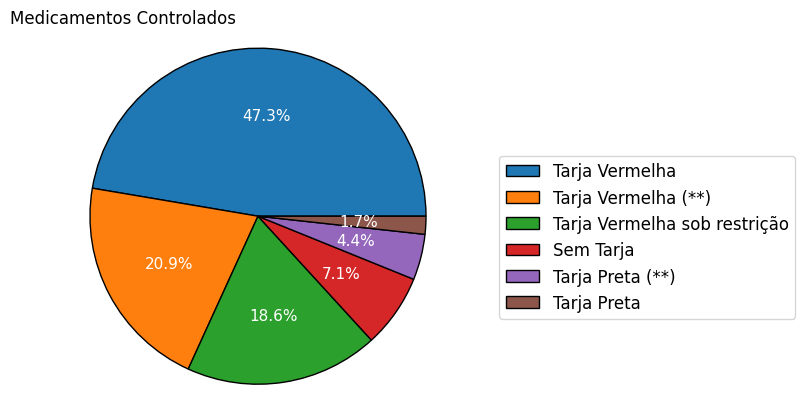

In [126]:
count = df["TARJA"].value_counts().values
classificacao = df["TARJA"].value_counts().index
plt.pie(count,autopct='%1.1f%%',  
        #colors = ["#fa3b3b", "#bf0b0b", "#fa0000", "#eeeeee", "#000000", "#444444"],
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 11, 'color':'white'}, 
        )
plt.axis("equal")
plt.legend(fontsize=12, loc = 'lower right',  labels=classificacao,bbox_to_anchor=(1.6, 0.2))
plt.title("Medicamentos Controlados" , loc='left')
plt.show()


# Utilizando mascara para listar todos os medicamentos com valor acima de 10.000 Reais

In [129]:
df.loc[[1] , ['PF Sem Impostos']]
mascara = (df['PF Sem Impostos'] > 10000)
df.loc[mascara]

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,...,PMC 20%,PMC 21%,PMC 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
11,TRASTUZUMABE,18.774.815/0001-93,AMGEN BIOTECNOLOGIA DO BRASIL LTDA.,KANJINTI,440 MG PO LIOF SOL INJ IV CT FA VD TRANS,"L1G3 - ANTICORPOS MONOCLONAIS ANTINEOPLÁSICOS,...",Biológico,Regulado,13049.69,13049.69,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Não,Tarja Vermelha
12,TRASTUZUMABE,18.774.815/0001-93,AMGEN BIOTECNOLOGIA DO BRASIL LTDA.,KANJINTI,440 MG PO LIOF SOL INJ IV CT FA VD TRANS DIL F...,"L1G3 - ANTICORPOS MONOCLONAIS ANTINEOPLÁSICOS,...",Biológico,Regulado,13049.69,13049.69,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha
14,TRASTUZUMABE,05.452.889/0001-61,CELLTRION HEALTHCARE DISTRIBUICAO DE PRODUTOS ...,HERZUMA,440 MG PO LIOF SOL INJ IV CT FA VD TRANS + DIL...,"L1G3 - ANTICORPOS MONOCLONAIS ANTINEOPLÁSICOS,...",Biológico,Regulado,13049.69,13049.69,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,NaN
28,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,VERZENIOS,100 MG COM REV CT BL AL AL X 60,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,10393.41,11640.62,...,19977.89,20261.26,20552.85,Não,Não,Não,Não,Negativa,Não,Tarja Vermelha
30,ABEMACICLIBE,43.940.618/0001-44,ELI LILLY DO BRASIL LTDA,VERZENIOS,150 MG COM REV CT BL AL AL X 60,L1H - INIBIDORES DE PROTEINA QUINASE,Novo,Regulado,14924.09,16714.98,...,28686.62,29093.50,29512.20,Não,Não,Não,Não,Negativa,Sim,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28684,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,64.171.697/0001-46,ACCORD FARMACÊUTICA LTDA,ÁCIDO ZOLEDRÔNICO,4 MG SOL INFUS IV CT 100 FA PLAS COC TRANS X 5 ML,M5B4 - BISFOSFONATOS PARA ALTERAÇÕES DO CÁCIO ...,Genérico,Regulado,103702.54,103702.54,...,NaN,NaN,NaN,Sim,Não,Não,Sim,Positiva,Não,Tarja Vermelha
28688,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,05.439.635/0001-03,ANTIBIÓTICOS DO BRASIL LTDA,ACIDO ZOLEDRONICO,4 MG PO LIOF SOL INFUS IV CX 25 FA VD TRANS X ...,M5B4 - BISFOSFONATOS PARA ALTERAÇÕES DO CÁCIO ...,Genérico,Regulado,11560.69,11560.69,...,NaN,NaN,NaN,Sim,Não,Não,Sim,Positiva,Não,Tarja Vermelha
28689,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,05.439.635/0001-03,ANTIBIÓTICOS DO BRASIL LTDA,ACIDO ZOLEDRONICO,4 MG PO LIOF SOL INFUS IV CX 50 FA VD TRANS X ...,M5B4 - BISFOSFONATOS PARA ALTERAÇÕES DO CÁCIO ...,Genérico,Regulado,23121.36,23121.36,...,NaN,NaN,NaN,Sim,Não,Não,Sim,Positiva,Não,Tarja Vermelha
28690,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,05.439.635/0001-03,ANTIBIÓTICOS DO BRASIL LTDA,ACIDO ZOLEDRONICO,4 MG PO LIOF SOL INFUS IV CX 100 FA VD TRANS X...,M5B4 - BISFOSFONATOS PARA ALTERAÇÕES DO CÁCIO ...,Genérico,Regulado,46242.74,46242.74,...,NaN,NaN,NaN,Sim,Não,Não,Sim,Positiva,Não,Tarja Vermelha


# Ordenar Medicamentos por Valor


In [130]:
df.sort_values('PF Sem Impostos' , ascending=False)

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,...,PMC 20%,PMC 21%,PMC 22%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
22018,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0X10E13 GV/ML SUS INJ CT 1 FA PLAS TRANS X 5...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Sim,Tarja Vermelha
22024,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0X10E13 GV/ML SUS INJ CT 1 FA PLAS TRANS X 5...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Sim,Tarja Vermelha
22037,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0 X 10E13 GV/ML SUS INJ CT 13 FA PLAS TRANS ...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Não,Tarja Vermelha
22038,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0 X 10E13 GV/ML SUS INJ CT 2 FA PLAS TRANS X...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Não,Tarja Vermelha
22039,ONASEMNOGENO ABEPARVOVEQUE,56.994.502/0001-30,NOVARTIS BIOCIENCIAS S.A,ZOLGENSMA,"2,0 X 10E13 GV/ML SUS INJ CT 1 FA PLAS TRANS X...",M5X - TODOS OS OUTROS FÁRMACOS COM AÇÃO MÚSCUL...,Produto de Terapia Avançada,Regulado,6785898.88,7600207.96,...,NaN,NaN,NaN,Sim,Não,Não,Não,Negativa,Não,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17462,IMUNOGLOBULINA HUMANA,58.430.828/0001-60,BLAU FARMACÊUTICA S.A.,IMUNOGLOBULIN,50 MG/ML SOL INJ CT FA VD INC X 20 ML,J6C - IMUNOGLOBULINAS POLIVALENTES INTRAVENOSAS,Similar,Regulado,0.01,0.01,...,NaN,NaN,NaN,Sim,Sim,Sim,Não,Positiva,Não,Tarja Vermelha (**)
940,ALENDRONATO DE SÓDIO TRI-HIDRATADO,00.923.140/0001-31,EMS SIGMA PHARMA LTDA,OSTEOFORM,70 MG COM CT BL AL PLAS OPC X 8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8957,CLORIDRATO DE MOXIFLOXACINO,45.992.062/0001-65,GERMED FARMACEUTICA LTDA,CLORIDRATO DE MOXIFLOXACINO,400 MG COM REV CT BL AL AL X 5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9408,CLORIDRATO DE PIOGLITAZONA,33.078.528/0001-32,TORRENT DO BRASIL LTDA,CLORIDRATO DE PIOGLITAZONA,45 MG COM CT BL AL/AL X 30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Listar os 20 Medicamentos mais caros , eliminando  duplicados com diversas formas de apresentacao

In [131]:
sorted_df = df.sort_values(['PF Sem Impostos','PF 0%'], ascending=False)
filtered_columns_df = sorted_df.iloc[:, [3,2, 7, 8]]
filtered_columns_df.drop_duplicates().head(20)


,PRODUTO,LABORATÓRIO,REGIME DE PREÇO,PF Sem Impostos
22004,ZOLGENSMA,NOVARTIS BIOCIENCIAS S.A,Regulado,6785898.88
5231,CARVYKTI®,JANSSEN-CILAG FARMACÊUTICA LTDA,Regulado,2266996.13
28250,LUXTURNA,NOVARTIS BIOCIENCIAS S.A,Regulado,2155753.34
2184,YESCARTA,GILEAD SCIENCES FARMACEUTICA DO BRASIL LTDA,Regulado,1573618.37
27338,KYMRIAH,NOVARTIS BIOCIENCIAS S.A,Regulado,1568166.09
12134,DICLORIDRATO DE DACLATASVIR,BLANVER FARMOQUIMICA E FARMACÊUTICA S.A.,Regulado,575496.67
28295,AMVUTTRA,SPECIALTY PHARMA GOIAS LTDA,Regulado,526743.19
28249,WAYLIVRA,PTC FARMACEUTICA DO BRASIL LTDA.,Regulado,483194.19
14025,EVEROLIMO,NATCOFARMA DO BRASIL LTDA,Regulado,404674.46
14033,EXHER,NATCOFARMA DO BRASIL LTDA,Regulado,404674.46


# Apresentacao grafica do controle de medicamento vs tipo de produto

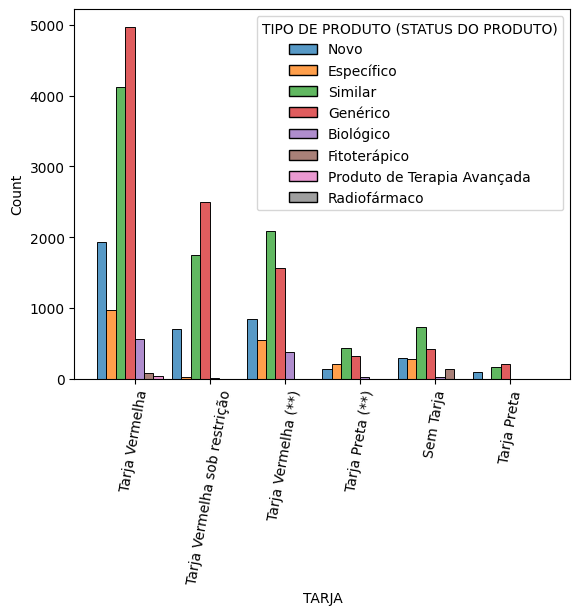

In [134]:
ax = sns.histplot(x = df['TARJA'], hue=df['TIPO DE PRODUTO (STATUS DO PRODUTO)'], multiple="dodge", 
shrink = 1, common_norm=False)
ax.tick_params(axis='x', rotation=80)

# Apresentacao grafica do tipo de produto vs controle de medicamento 

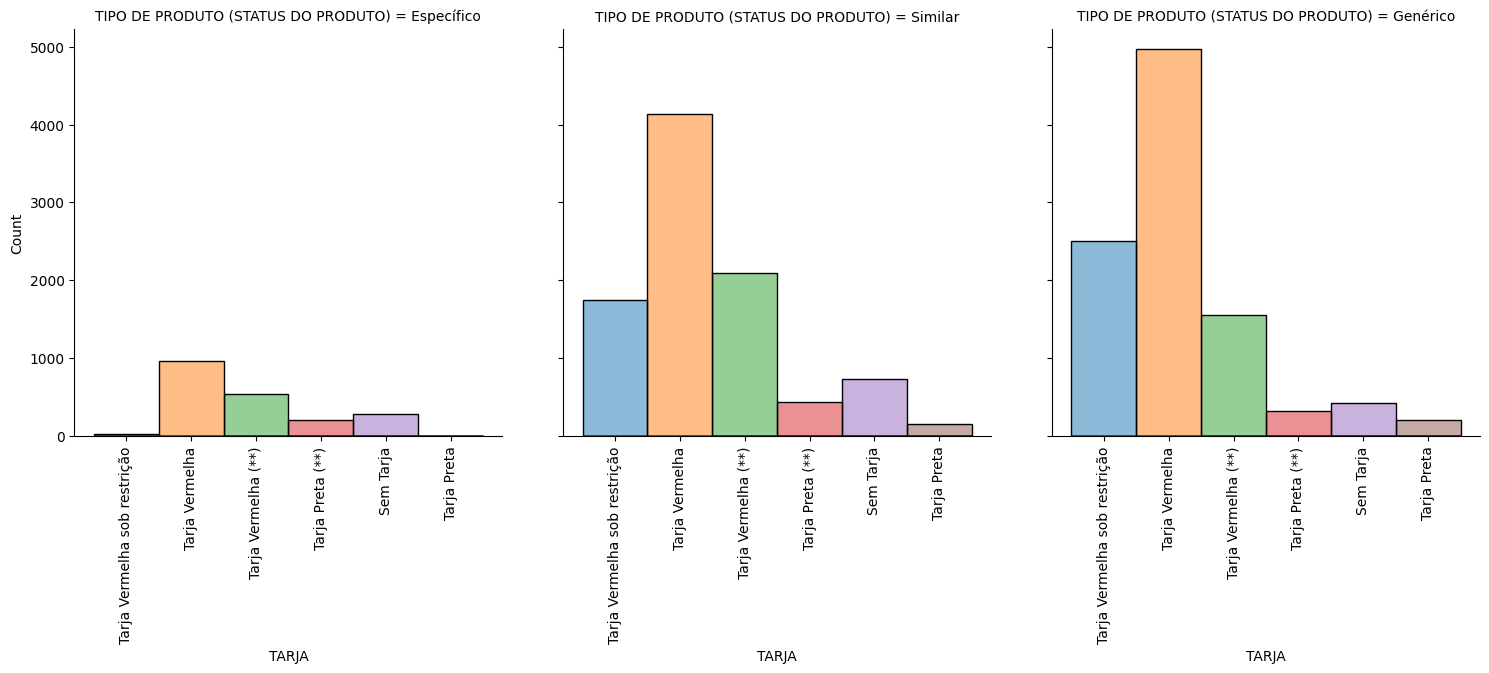

In [135]:
filtered_df = df[df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].isin(['Específico', 'Genérico', 'Similar'])]
P = sns.displot(filtered_df, x="TARJA", hue="TARJA", col="TIPO DE PRODUTO (STATUS DO PRODUTO)", col_wrap=3,height=5,legend=False )
P.tick_params(axis='x', rotation=90)
plt.show()

# Listar todos os produtos que possuem Losartana em sua composicao

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
df = pd.read_csv (r"C:\Users\Casa\Desktop\Projeto\medicamentos_anvisa.csv" , sep="," , encoding='UTF-8')


df_substancia1 = df[df['PRODUTO'].str.contains("LOSARTANA")] & (df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].str.contains('Genérico'))
resultado1_df = df_substancia1.iloc[:, [3,2,4]]

resultado1_df.head(40)






TypeError: unsupported operand type(s) for &: 'str' and 'bool'